# Crust 1.0

In this notebook, we will implement [Crust 1.0](https://igppweb.ucsd.edu/~gabi/crust1.html) as four `AxiSEM3D` models:

1. A volumetric model for P-velocity, S-velocity and density (`StructuredGridV3D`)
2. A geometric model for surface undulation (`StructuredGridG3D`)
3. A geometric model for moho undulation (`StructuredGridG3D`)
4. An ocean-load model for the ocean (`StructuredGridO3D`)


In [2]:
import numpy as np
from scipy.interpolate import interp1d
from skimage.filters import gaussian
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from matplotlib import cm

from mpl_toolkits.basemap import Basemap

from itertools import chain
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

    m.scatter(0,0,latlon=True,
    s=100,c='y',marker='*',alpha=1,edgecolors='k')
    
    m.scatter(10,0,latlon=True,
    s=100,c='y',marker='*',alpha=1,edgecolors='k')

# 1. User options

Please specify the following options: 

In [2]:
# radius of Core-Mantle Boudnary (CMB) in the mesh
RADIUS_CMB = 3480e3

## The geometric models

(41, 41, 11)


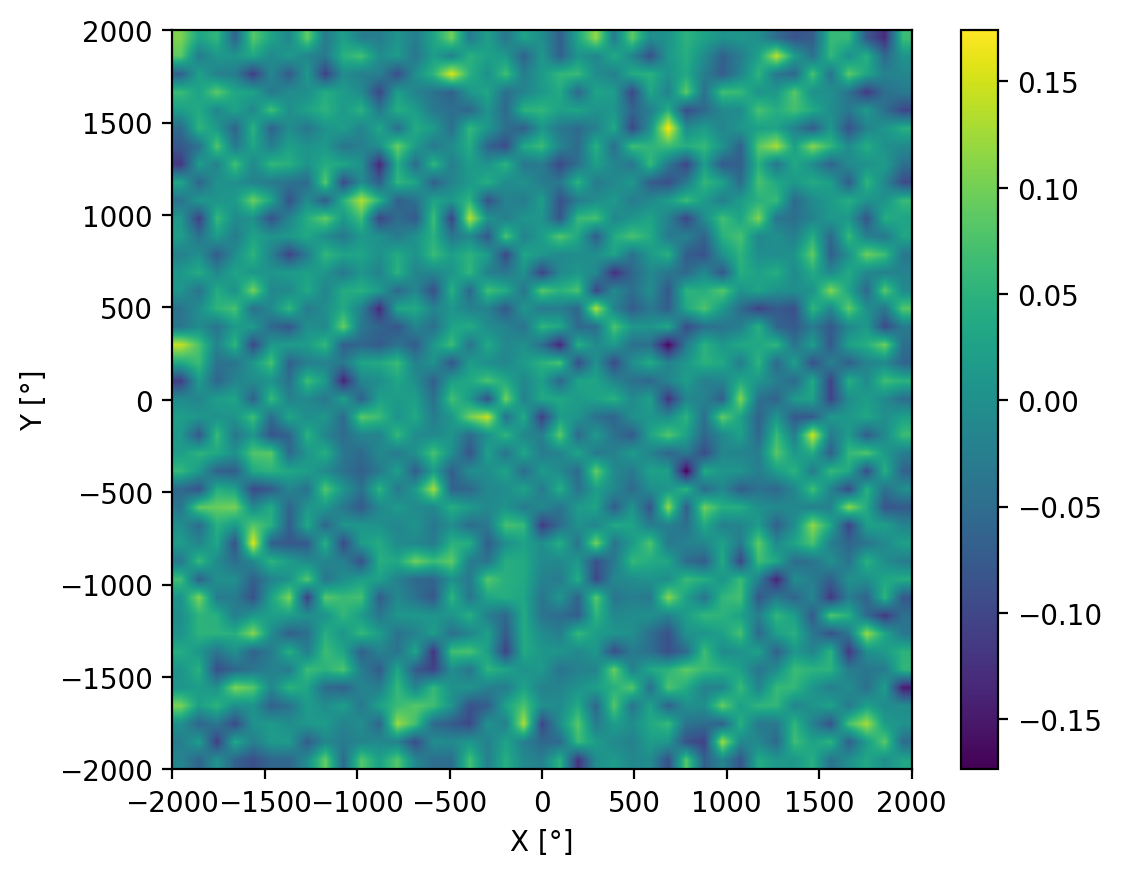

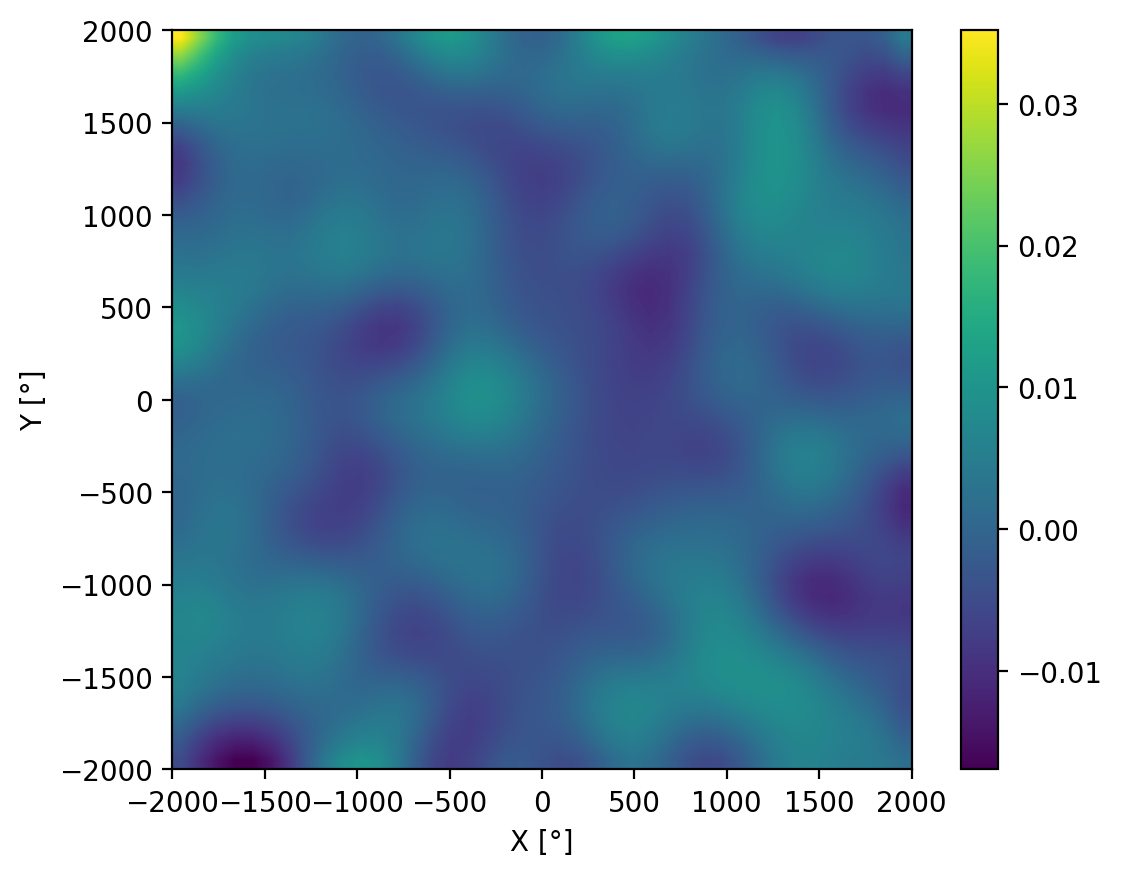

In [7]:

# # Our 2-dimensional distribution will be over variables grid_lat and grid_lon
scale = 5
sigma = 2

depth = np.linspace(0, 1000, 11)
grid_x = np.linspace(-2000, 2000, 41)
grid_y = np.linspace(-2000, 2000, 41)

# Make sure Coordinates are ascendingly sorted
grid_x.sort()
grid_y.sort()

GridX, GridY, GridDepth = np.meshgrid(grid_x, grid_y, depth)
MLtomo_ptb =np.random.normal(loc=0.0, scale=0.05, size=(len(grid_x), len(grid_y), len(depth)))

print(np.shape(MLtomo_ptb))

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(dpi=200)
ax = fig.gca()
# ax = fig.gca(projection='3d')

extent = np.min(grid_x), np.max(grid_x), np.min(grid_y), np.max(grid_y)
PLOT = ax.imshow(MLtomo_ptb[:,:,0], cmap=cm.viridis, interpolation='bilinear', extent=extent)

ax.set_aspect(1)
ax.set_xlabel("X [\N{degree sign}]")
ax.set_ylabel("Y [\N{degree sign}]")
plt.colorbar(PLOT)

# plt.savefig("IC_Scattering_plot.png", format="png")
plt.show()


## smooth the random model 
MLtomo_ptb_smooth = gaussian(MLtomo_ptb, sigma=sigma)
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(dpi=200)
ax = fig.gca()
# ax = fig.gca(projection='3d')

extent = np.min(grid_x), np.max(grid_x), np.min(grid_y), np.max(grid_y)
PLOT = ax.imshow(MLtomo_ptb_smooth[:,:,0], cmap=cm.viridis, interpolation='bilinear', extent=extent)

ax.set_aspect(1)
ax.set_xlabel("X [\N{degree sign}]")
ax.set_ylabel("Y [\N{degree sign}]")
plt.colorbar(PLOT)

# plt.savefig("IC_Scattering_plot.png", format="png")
plt.show()

(array([[ 2., 11., 32., ..., 45., 19.,  3.],
        [ 1.,  1., 15., ..., 37.,  4.,  0.],
        [ 0.,  1.,  2., ..., 23.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ..., 17.,  2.,  0.],
        [ 0.,  0., 14., ..., 29.,  3.,  1.],
        [ 0.,  7., 22., ..., 36., 17.,  1.]]),
 array([-0.02663387, -0.02181457, -0.01699528, -0.01217598, -0.00735669,
        -0.00253739,  0.00228191,  0.0071012 ,  0.0119205 ,  0.01673979,
         0.02155909]),
 <a list of 401 BarContainer objects>)

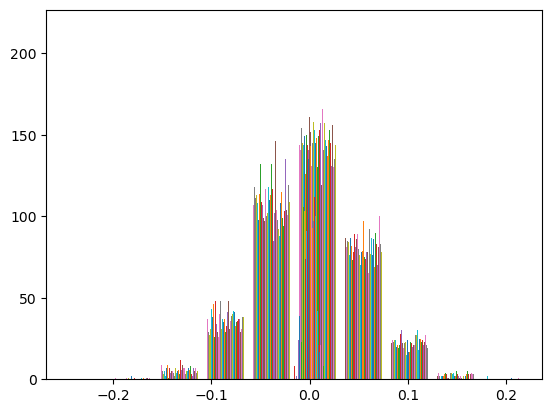

In [4]:
plt.hist(MLtomo_ptb[:,:,0], 10, density = False)
plt.hist(MLtomo_ptb_smooth[:,:,0], 10, density = False)

/var/folders/j1/5bbg7cxd17j11zmv1ffb7wrr0000gn/T/ipykernel_14681/884243881.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  PLOT = m.pcolormesh(LON, LAT, MLtomo_ptb[:,:,-1], latlon=True, cmap=cm.viridis)
/var/folders/j1/5bbg7cxd17j11zmv1ffb7wrr0000gn/T/ipykernel_14681/884243881.py:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  PLOT = m.pcolormesh(LON, LAT, MLtomo_ptb_smooth[:,:,-1], latlon=True, cmap=cm.viridis)


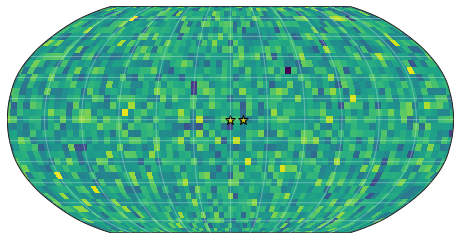

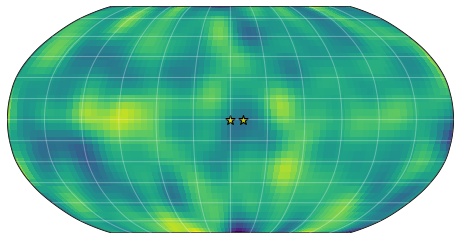

In [5]:
fig = plt.figure(figsize=(3.54, 2.65), edgecolor='w')
# m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=-90, urcrnrlat=90,
#             llcrnrlon=-180, urcrnrlon=180, )
# m = Basemap(projection='moll',lon_0=0,resolution='c')
m = Basemap(projection='robin',lon_0=0,resolution='c')

LON, LAT = np.meshgrid(grid_lon, grid_lat)
PLOT = m.pcolormesh(LON, LAT, MLtomo_ptb[:,:,-1], latlon=True, cmap=cm.viridis)

draw_map(m)




fig = plt.figure(figsize=(3.54, 2.65), edgecolor='w')
# m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=-90, urcrnrlat=90,
#             llcrnrlon=-180, urcrnrlon=180, )
m = Basemap(projection='robin',lon_0=0,resolution='c')

LON, LAT = np.meshgrid(grid_lon, grid_lat)
PLOT = m.pcolormesh(LON, LAT, MLtomo_ptb_smooth[:,:,-1], latlon=True, cmap=cm.viridis)

draw_map(m)

In [47]:
print(grid_lat.min(),grid_lat.max())
print(grid_lon.min(),grid_lon.max())
print(radius.min(),radius.max())
print(MLtomo_ptb_smooth.min(),MLtomo_ptb_smooth.max())

# write to file
nc = Dataset('input/random_tomo.nc', 'w')
nc.createDimension('nlat', size=len(grid_lat))
nc.createDimension('nlon', size=len(grid_lon))
nc.createDimension('nradius', size=len(radius))
nc.createVariable('latitude', float, dimensions=('nlat'))
nc['latitude'][:] = grid_lat
nc.createVariable('longitude', float, dimensions=('nlon'))
nc['longitude'][:] = grid_lon
nc.createVariable('radius', float, dimensions=('nradius'))
nc['radius'][:] = radius
nc.createVariable('dvs', float, dimensions=('nlat', 'nlon','nradius'))
nc['dvs'][:,:,:] = MLtomo_ptb_smooth[:,:,:]
nc.close()

-90.0 90.0
-180.0 180.0
0.0 6371.0
-0.04102944108917078 0.0384879335307242


## Load S40RTS Model

In [9]:
s40rts = Dataset('./S40RTS_dvs.nc', 'r')
s40rts_tomo = s40rts['v'][:,:,:]
latitude = s40rts['latitude'][:]
longitude = s40rts['longitude'][:]

In [7]:
np.shape(s40rts['v'][:,:,:])

(303, 181, 360)

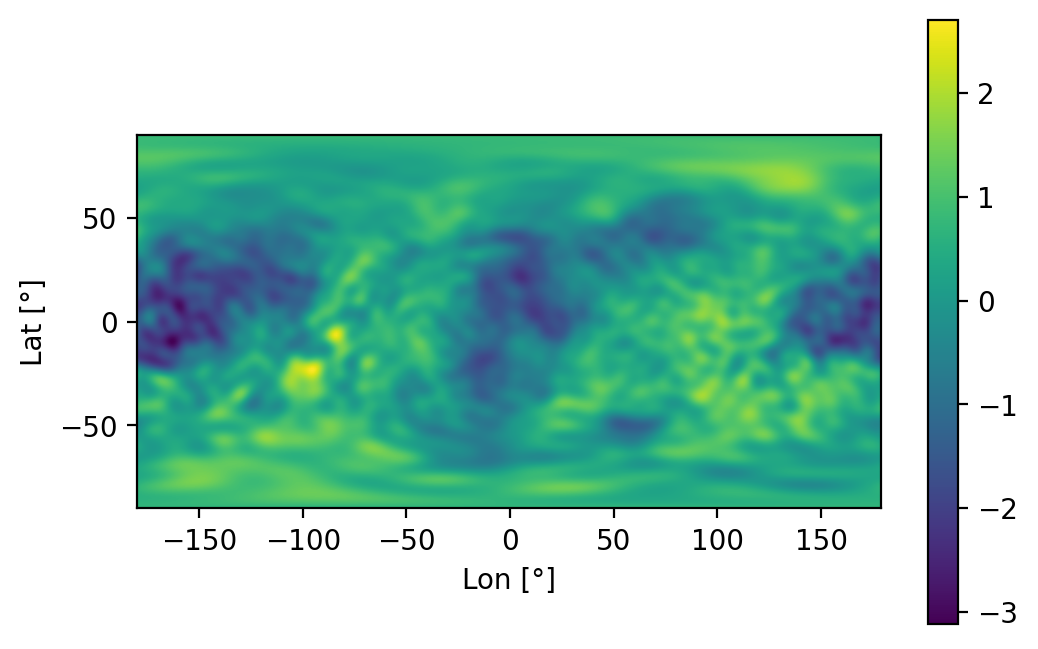

In [50]:
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(dpi=200)
ax = fig.gca()
# ax = fig.gca(projection='3d')

extent = np.min(longitude), np.max(longitude), np.min(latitude), np.max(latitude)
PLOT = ax.imshow(s40rts_tomo[-1,:,:], cmap=cm.viridis, interpolation='bilinear', extent=extent)

ax.set_aspect(1)
ax.set_xlabel("Lon [\N{degree sign}]")
ax.set_ylabel("Lat [\N{degree sign}]")
plt.colorbar(PLOT)

# plt.savefig("IC_Scattering_plot.png", format="png")
plt.show()

### Model Visualization

-180.0 179.0
(181, 360)
(181, 360)


/var/folders/j1/5bbg7cxd17j11zmv1ffb7wrr0000gn/T/ipykernel_62479/2407027845.py:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  PLOT = m.pcolormesh(LON, LAT, s40rts_tomo[-1,:,:], latlon=True, cmap=cm.viridis)


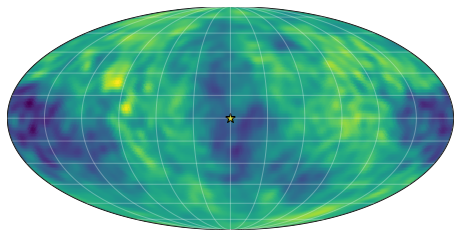

In [82]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
# m = Basemap(projection='cyl', resolution=None,
#             llcrnrlat=-90, urcrnrlat=90,
#             llcrnrlon=-180, urcrnrlon=180, )
m = Basemap(projection='moll',lon_0=0,resolution='c')

extent = np.min(longitude), np.max(longitude), np.min(latitude), np.max(latitude)
# PLOT = m.imshow(s40rts_tomo[-1,:,:], cmap=cm.viridis, interpolation='bilinear', extent=extent)

LON, LAT = np.meshgrid(longitude, latitude)

print(min(longitude), max(longitude))

print(np.shape(LAT))
print(np.shape(s40rts_tomo[-1,:,:]))
PLOT = m.pcolormesh(LON, LAT, s40rts_tomo[-1,:,:], latlon=True, cmap=cm.viridis)

m.scatter(0,0,latlon=True,
    s=100,c='y',marker='*',alpha=1,edgecolors='k')

draw_map(m)